In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# read in the sample dataset
df = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [3]:
# check to see if datatypes are good as imported. Or do we need changes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
ticket_number            50000 non-null int64
issue_date               50000 non-null datetime64[ns]
violation_location       50000 non-null object
license_plate_number     50000 non-null object
license_plate_state      49998 non-null object
license_plate_type       49383 non-null object
zipcode                  41550 non-null object
violation_code           50000 non-null object
violation_description    50000 non-null object
unit                     50000 non-null int64
unit_description         50000 non-null object
vehicle_make             50000 non-null object
fine_level1_amount       50000 non-null int64
fine_level2_amount       50000 non-null int64
current_amount_due       50000 non-null float64
total_payments           50000 non-null float64
ticket_queue             50000 non-null object
ticket_queue_date        50000 non-null datetime64[ns]
notice_level             36707 

In [4]:
# convert types where needed
df['ticket_number'] = df.ticket_number.astype(object)
df['unit'] = df.unit.astype(object)
df['notice_number'] = df.notice_number.astype(object)

In [5]:
df.head(1)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il"


In [6]:
# recheck data types and which items have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
ticket_number            50000 non-null object
issue_date               50000 non-null datetime64[ns]
violation_location       50000 non-null object
license_plate_number     50000 non-null object
license_plate_state      49998 non-null object
license_plate_type       49383 non-null object
zipcode                  41550 non-null object
violation_code           50000 non-null object
violation_description    50000 non-null object
unit                     50000 non-null object
unit_description         50000 non-null object
vehicle_make             50000 non-null object
fine_level1_amount       50000 non-null int64
fine_level2_amount       50000 non-null int64
current_amount_due       50000 non-null float64
total_payments           50000 non-null float64
ticket_queue             50000 non-null object
ticket_queue_date        50000 non-null datetime64[ns]
notice_level             3670

note that license_plate_state, license_plate_type, zipcode, notice_level, and hearing_disposition have null values.
zipcode approx 1 in 5 unknown
notice_level approx. 1/3 are handled before reaching a notice_level (account number formally assigned and 'tab being run')
hearing_disposition approx 1 in 10 tickets are contested (go to hearing)


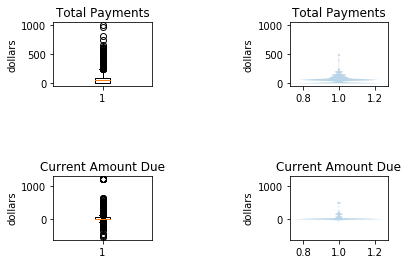

In [30]:
#try creating box plots and associated violin plots
tot_pay = np.array(df.total_payments)
plt.subplot(331)
plt.boxplot(tot_pay)
plt.ylabel('dollars')
plt.title('Total Payments')

plt.subplot(333)
plt.violinplot(tot_pay, showextrema=False,)
plt.ylabel('dollars')
plt.title('Total Payments')

curr_amt = np.array(df.current_amount_due)
plt.subplot(337)
plt.boxplot(curr_amt)
plt.ylabel('dollars')
plt.title('Current Amount Due')

plt.subplot(339)
plt.violinplot(curr_amt, showextrema=False,)
plt.ylabel('dollars')
plt.title('Current Amount Due')

plt.show()

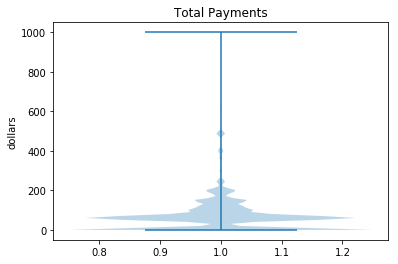

In [32]:
# try creating violin plots
tot_pay_box_plot = np.array(df.total_payments)
#plt.subplot(221)
plt.violinplot(tot_pay_box_plot)
plt.ylabel('dollars')
plt.title('Total Payments')


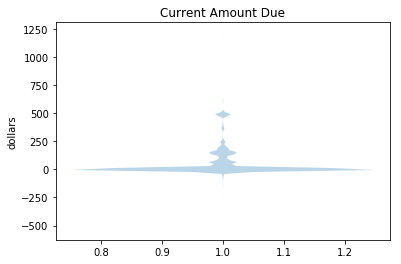

In [53]:
curr_amt = np.array(df.current_amount_due)

plt.violinplot(curr_amt, showextrema=False)
plt.ylabel('dollars')
plt.title('Current Amount Due')

plt.show()

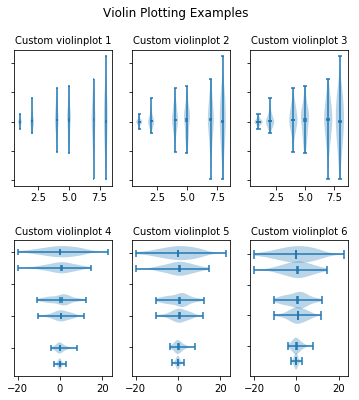

In [14]:
# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axes[0, 1].violinplot(data, pos, points=40, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axes[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axes[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)
axes[1, 0].set_title('Custom violinplot 4', fontsize=fs)

axes[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[1, 1].set_title('Custom violinplot 5', fontsize=fs)

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.5)
axes[1, 2].set_title('Custom violinplot 6', fontsize=fs)

for ax in axes.flatten():
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

In [39]:
# make a copy of database for reduced columns
df_red = df.copy()
df_red.head(1)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il"


In [40]:
# make a copy of database for minimal columns
df_min_col = df.copy()
df_min_col.head(1)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il"


In [41]:
df_min_col = df_min_col.drop(['violation_location', 'license_plate_number', 'license_plate_state', 'license_plate_type', 'violation_code', 'violation_description', 'unit', 'unit_description',
                   'vehicle_make', 'fine_level2_amount', 'officer', 'address'], axis=1)
df_min_col

,ticket_number,issue_date,zipcode,fine_level1_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number
0,9188814621,2015-05-07 13:52:00,48103,50,0.0,50.0,Paid,2015-05-13,NaN,NaN,0
1,65543631,2015-01-10 17:09:00,606394357,60,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290
2,9188975267,2015-06-11 18:49:00,606134985,60,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770
3,64465302,2015-01-14 08:09:00,605442187,150,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940
4,9189537354,2015-10-28 16:26:00,60625,50,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170
5,65748686,2015-03-14 23:05:00,606493400,150,0.0,150.0,Paid,2015-04-13,VIOL,NaN,5184282980
6,65198948,2015-02-02 22:20:00,608034019,200,0.0,0.0,Dismissed,2015-04-20,VIOL,Not Liable,5182972160
7,9189684298,2015-11-19 20:26:00,NaN,60,60.0,0.0,Define,2015-11-23,NaN,NaN,0
8,66116401,2015-08-15 22:46:00,606232113,200,488.0,0.0,Notice,2016-10-03,SEIZ,NaN,5193679090
9,66291855,2015-11-24 23:24:00,535113434,60,146.4,0.0,Notice,2015-12-17,SEIZ,NaN,5185329810


In [42]:
df_red.columns


Index(['ticket_number', 'issue_date', 'violation_location',
       'license_plate_number', 'license_plate_state', 'license_plate_type',
       'zipcode', 'violation_code', 'violation_description', 'unit',
       'unit_description', 'vehicle_make', 'fine_level1_amount',
       'fine_level2_amount', 'current_amount_due', 'total_payments',
       'ticket_queue', 'ticket_queue_date', 'notice_level',
       'hearing_disposition', 'notice_number', 'officer', 'address'],
      dtype='object')

In [43]:
df_r = df_red.drop(['violation_location', 'license_plate_number', 'license_plate_type', 'unit', 'unit_description',
                   'vehicle_make', 'officer', 'address'], axis=1)

In [44]:
df_r.head(1)

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0


In [45]:
df_r.columns

Index(['ticket_number', 'issue_date', 'license_plate_state', 'zipcode',
       'violation_code', 'violation_description', 'fine_level1_amount',
       'fine_level2_amount', 'current_amount_due', 'total_payments',
       'ticket_queue', 'ticket_queue_date', 'notice_level',
       'hearing_disposition', 'notice_number'],
      dtype='object')

In [46]:
# create a length_in_days column for days between issue_date and ticket_queue_date
df_r['days_active'] = ((df_r.ticket_queue_date - df_r.issue_date)/np.timedelta64(1, 'D')).astype(int)

In [47]:
# create a total_fines column for sum of current_amount_due and total_payments
df_r['total_fines'] = df_r.current_amount_due + df_r.total_payments

In [48]:
df_r.head(2)

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,days_active,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,5,50.0
1,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,17,146.4


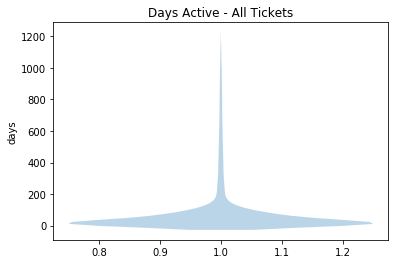

In [51]:
days = np.array(df_r.days_active)

plt.violinplot(days, showextrema=False )
plt.ylabel('days')
plt.title('Days Active - All Tickets')

plt.show()

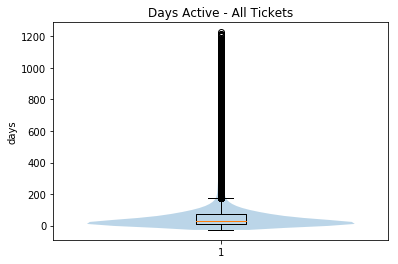

In [58]:
days = np.array(df_r.days_active)

plt.violinplot(days, showextrema=False, widths=0.8 )
plt.ylabel('days')
plt.title('Days Active - All Tickets')

# overlay a box plot
plt.boxplot(days)

plt.show()

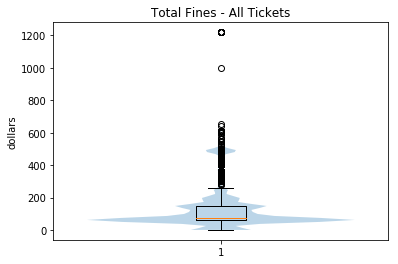

In [59]:
fines = np.array(df_r.total_fines)

plt.violinplot(fines, showextrema=False, widths=0.8 )
plt.ylabel('dollars')
plt.title('Total Fines - All Tickets')

# overlay a box plot
plt.boxplot(fines)

plt.show()

In [65]:
df_r.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
ticket_number            50000 non-null object
issue_date               50000 non-null datetime64[ns]
license_plate_state      49998 non-null object
zipcode                  41550 non-null object
violation_code           50000 non-null object
violation_description    50000 non-null object
fine_level1_amount       50000 non-null int64
fine_level2_amount       50000 non-null int64
current_amount_due       50000 non-null float64
total_payments           50000 non-null float64
ticket_queue             50000 non-null object
ticket_queue_date        50000 non-null datetime64[ns]
notice_level             50000 non-null object
hearing_disposition      5337 non-null object
notice_number            50000 non-null object
len_in_days              50000 non-null int32
total_fines              50000 non-null float64
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2), object(9)
memory u

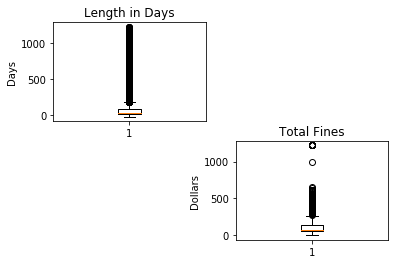

In [67]:
#try creating box plots
len_days_box_plot = np.array(df_r.len_in_days)
plt.subplot(221)
plt.boxplot(len_days_box_plot, autorange=True)
plt.ylabel('Days')
plt.title('Length in Days')

tot_fines_boxplot = np.array(df_r.total_fines)
plt.subplot(224)
plt.boxplot(tot_fines_boxplot)
plt.ylabel('Dollars')
plt.title('Total Fines')

plt.show()

In [27]:
# fill missing data in notice_level with 'None'
df_r['notice_level'].fillna('none', inplace=True)

In [28]:
df_r.head()

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,len_in_days,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,none,NaN,0,5 days 10:08:00,50.0
1,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,17 days 06:51:00,146.4
2,9188975267,2015-06-11 18:49:00,IL,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770,11 days 05:11:00,60.0
3,64465302,2015-01-14 08:09:00,IL,605442187,0964130A,PARK ALLEY,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,103 days 15:51:00,150.0
4,9189537354,2015-10-28 16:26:00,IL,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,90 days 07:34:00,100.0


In [59]:
# let's look at all tickets by 'notice_number' grouped by number unique
tickets_nn = df_r.groupby(['notice_number']).nunique()
tickets_nn

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,len_in_days,total_fines
notice_number,,,,,,,,,,,,,,,,,
0,10568,10346,57,1723,73,72,13,13,28,20,4,428,1,0,1,7658,15
5012607640,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012610400,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012630280,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012634160,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012650100,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012671110,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012691000,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
5012691410,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
tickets_sorted_nn = tickets_nn.sort_values(by=['ticket_number'], ascending=False)
tickets_sorted_nn.head(10)

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,len_in_days,total_fines
notice_number,,,,,,,,,,,,,,,,,
0,10568,10346,57,1723,73,72,13,13,28,20,4,428,1,0,1,7658,15
5044442080,138,138,26,1,18,18,8,8,2,10,3,63,4,2,1,137,10
5044442070,115,115,25,1,17,17,7,7,4,9,3,81,4,1,1,115,8
5138721400,83,83,19,1,16,16,8,8,2,10,2,68,4,1,1,83,9
5044442130,24,24,1,1,10,10,6,6,3,8,1,10,2,0,1,24,7
5165135590,24,24,5,1,9,9,6,6,1,7,2,23,2,0,1,24,7
5193584770,13,13,1,1,8,8,5,5,2,6,1,7,3,0,1,13,5
5177323210,13,13,1,1,2,2,2,2,2,1,1,10,1,0,1,13,2
5044442440,9,9,1,1,6,6,5,5,1,5,2,7,1,0,1,9,5


In [31]:
df_r[df_r.notice_number==0].license_plate_state.unique()

array(['MI', 'IL', 'FL', 'MN', 'KY', 'TX', 'CT', 'IN', 'AZ', 'VT', 'CA',
       'MA', 'MO', 'LA', 'WA', 'WI', 'OH', 'NY', 'NJ', 'QU', 'CO', 'IA',
       'WV', 'ID', 'GA', 'OK', 'VA', 'AL', 'TN', 'NE', 'PA', 'BC', 'ON',
       'MD', 'KS', 'NC', 'SD', 'AR', 'NB', 'DE', 'OR', 'AK', 'UT', 'MS',
       'ND', 'NV', 'SC', nan, 'NH', 'MX', 'AB', 'DC', 'RI', 'MT', 'NM',
       'MB', 'ME', 'WY'], dtype=object)

In [32]:
df_r[df_r.notice_number==0].notice_level.unique()

array(['none'], dtype=object)

In [33]:
df_r[df_r.notice_number==0].ticket_queue.unique()

array(['Paid', 'Define', 'Dismissed', 'Notice'], dtype=object)

In [34]:
# notice_number 0 represents where the owner was unidentified by the city
# therefore 1 in 5 tickets is uncollectable, (on their own, the owners came forward and paid approximately half of these tickets) 
df_r['ticket_queue'][(df_r.notice_number==0)].value_counts()

Paid         5567
Define       4401
Dismissed     599
Notice          1
Name: ticket_queue, dtype: int64

In [35]:
# take a look at tickets that have been overpaid
df_r['current_amount_due'][df_r.current_amount_due < 0.0].describe()

count    280.000000
mean     -71.594500
std       71.442248
min     -538.820000
25%      -75.000000
50%      -60.000000
75%      -50.000000
max       -0.010000
Name: current_amount_due, dtype: float64

In [36]:
# dollar amount that has been overpaid
df_r['current_amount_due'][df_r.current_amount_due< 0.0].sum()

-20046.46

Note: if $20,046.46 has been overpaid for 50,000 records, this suggests that over a 7 million record dataset, overpayment could approach $3 million dollars.

In [37]:
# check possible outcomes of going to a hearing to contest a ticket
df_r['hearing_disposition'].value_counts()

Not Liable    3532
Liable        1805
Name: hearing_disposition, dtype: int64

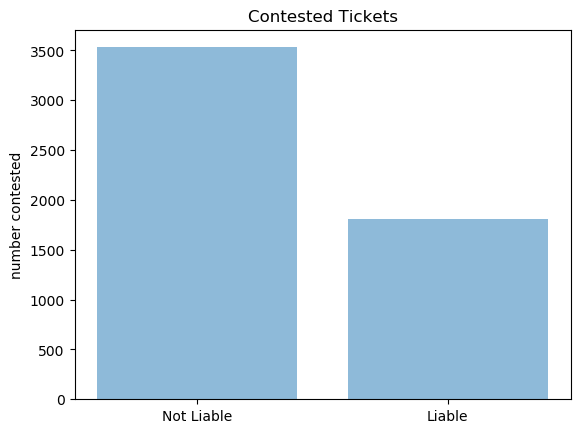

In [101]:

dispo = df_r.hearing_disposition.value_counts()
objects = ['Not Liable', 'Liable']

y_pos = np.arange(len(objects))
plt.bar(x=objects,  height=dispo, alpha=0.5, align='center')
plt.ylabel('number contested')
plt.xticks(y_pos, objects)
plt.title('Contested Tickets')

plt.show()

In [38]:
# this suggests that your chances of beating a ticket are 2 to 1 in your favor, as 2/3 of hearings decide for the plaintiff
3532/(3532+1805)

0.6617950159265505

In [70]:
dispo = np.array(df_r.hearing_disposition.value_counts())
dispo

array([3532, 1805], dtype=int64)

In [73]:
df_r.hearing_disposition.unique()

array([nan, 'Not Liable', 'Liable'], dtype=object)

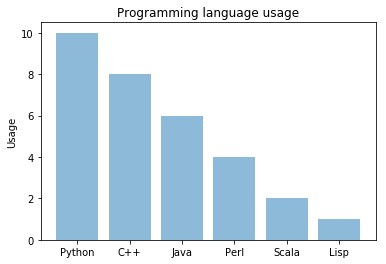

In [69]:
# non-related tutorial example on using a bar chart
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

86.5 frames per second


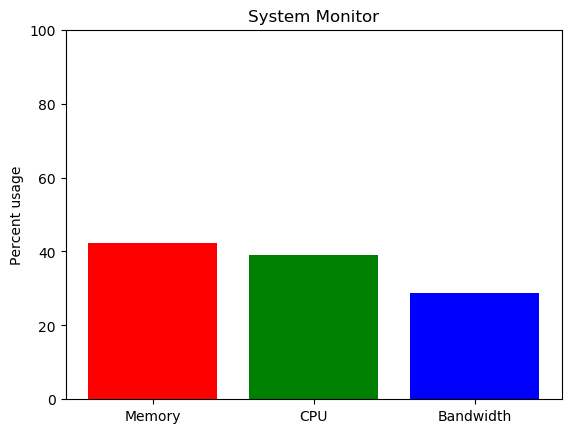

In [98]:
# non-related example on using a bar chart
import time

def get_memory(t):
    "Simulate a function that returns system memory"
    return 100 * (0.5 + 0.5 * np.sin(0.5 * np.pi * t))


def get_cpu(t):
    "Simulate a function that returns cpu usage"
    return 100 * (0.5 + 0.5 * np.sin(0.2 * np.pi * (t - 0.25)))


def get_net(t):
    "Simulate a function that returns network bandwidth"
    return 100 * (0.5 + 0.5 * np.sin(0.7 * np.pi * (t - 0.1)))


def get_stats(t):
    return get_memory(t), get_cpu(t), get_net(t)

fig, ax = plt.subplots()
ind = np.arange(1, 4)

# show the figure, but do not block
#plt.show(block=False)


pm, pc, pn = plt.bar(ind, get_stats(0))
pm.set_facecolor('r')
pc.set_facecolor('g')
pn.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Memory', 'CPU', 'Bandwidth'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent usage')
ax.set_title('System Monitor')

start = time.time()
for i in range(200):  # run for a little while
    m, c, n = get_stats(i / 10.0)

    # update the animated artists
    pm.set_height(m)
    pc.set_height(c)
    pn.set_height(n)

    # ask the canvas to re-draw itself the next time it
    # has a chance.
    # For most of the GUI backends this adds an event to the queue
    # of the GUI frameworks event loop.
    fig.canvas.draw_idle()
    try:
        # make sure that the GUI framework has a chance to run its event loop
        # and clear any GUI events.  This needs to be in a try/except block
        # because the default implementation of this method is to raise
        # NotImplementedError
        fig.canvas.flush_events()
    except NotImplementedError:
        pass

stop = time.time()
print("{fps:.1f} frames per second".format(fps=200 / (stop - start)))

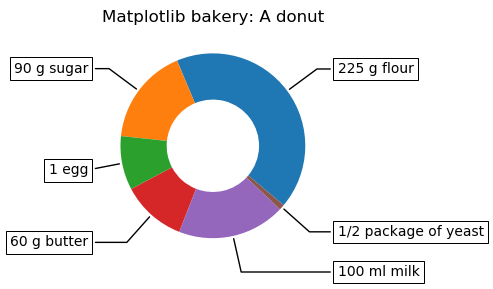

In [102]:
# non-related example on using a donut plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

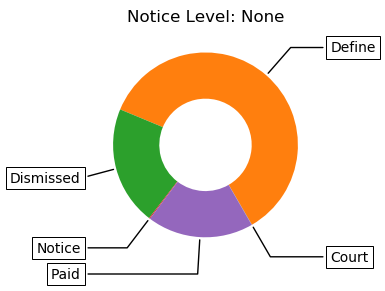

In [109]:
# try creating a donut plot on Notice Level:None ticket-count

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Court",
          "Define",
          "Dismissed",
          "Notice",
          "Paid",]

data = [4, 4401, 1519, 13, 1356]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-60)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: None")


plt.show()

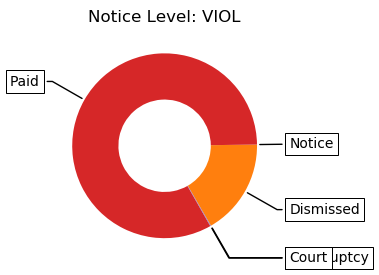

In [141]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Bankruptcy",
          "Dismissed",
          "Notice",
          "Paid",
          "Court"]

data = [4, 2437, 1, 12014, 15]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-60)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: VIOL")


plt.show()

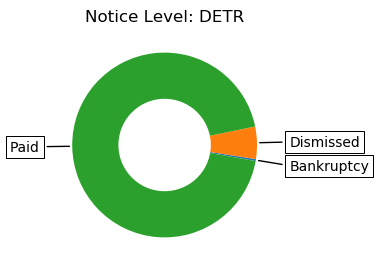

In [146]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Bankruptcy",
          "Dismissed",
          "Paid"]

data = [21, 353, 5871]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-10)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: DETR")


plt.show()

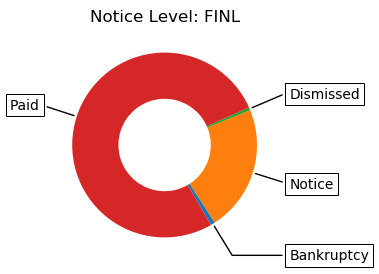

In [149]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Bankruptcy",
          "Notice",
          "Dismissed",
          "Paid"]

data = [35, 945, 22, 3292]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-60)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: FINL")


plt.show()

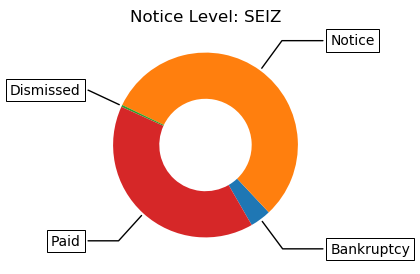

In [151]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Bankruptcy",
          "Notice",
          "Dismissed",

          "Paid"]

data = [346, 5263, 33, 3780]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-60)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: SEIZ")


plt.show()

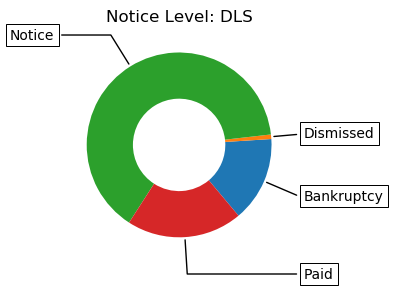

In [153]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

ticket_queue = ["Bankruptcy",
          "Dismissed",
          "Notice",
          "Paid"]

data = [339, 18, 1458, 460]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-50)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ticket_queue[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Notice Level: DLS")


plt.show()

In [154]:
# make a copy of the dataframe to use minimal columns
df_mc = df_r.copy()
df_mc.head()

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,days_active,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,5,50.0
1,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,17,146.4
2,9188975267,2015-06-11 18:49:00,IL,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770,11,60.0
3,64465302,2015-01-14 08:09:00,IL,605442187,0964130A,PARK ALLEY,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,103,150.0
4,9189537354,2015-10-28 16:26:00,IL,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,90,100.0


In [155]:
# make a copy of the dataframe to set up indexes
df_i = df_r.copy()
df_i

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,days_active,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,5,50.0
1,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,17,146.4
2,9188975267,2015-06-11 18:49:00,IL,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770,11,60.0
3,64465302,2015-01-14 08:09:00,IL,605442187,0964130A,PARK ALLEY,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,103,150.0
4,9189537354,2015-10-28 16:26:00,IL,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,90,100.0
5,65748686,2015-03-14 23:05:00,IL,606493400,0964100A,WITHIN 15' OF FIRE HYDRANT,150,300,0.0,150.0,Paid,2015-04-13,VIOL,NaN,5184282980,29,150.0
6,65198948,2015-02-02 22:20:00,IL,608034019,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",200,400,0.0,0.0,Dismissed,2015-04-20,VIOL,Not Liable,5182972160,76,0.0
7,9189684298,2015-11-19 20:26:00,IL,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,60,120,60.0,0.0,Define,2015-11-23,NaN,NaN,0,3,60.0
8,66116401,2015-08-15 22:46:00,IL,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",200,400,488.0,0.0,Notice,2016-10-03,SEIZ,NaN,5193679090,414,488.0
9,66291855,2015-11-24 23:24:00,WI,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-12-17,SEIZ,NaN,5185329810,22,146.4


In [159]:
df_i.head(1)

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,days_active,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,5,50.0


In [160]:
# set an index
new_index = ['notice_level', 'ticket_queue']
df_i.set_index(new_index, inplace=True)
df_i.head(3)

,,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue_date,hearing_disposition,notice_number,days_active,total_fines
notice_level,ticket_queue,,,,,,,,,,,,,,,
NaN,Paid,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,2015-05-13,NaN,0,5,50.0
SEIZ,Notice,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,2015-01-28,NaN,5109291290,17,146.4
VIOL,Paid,9188975267,2015-06-11 18:49:00,IL,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,0.0,60.0,2015-06-23,NaN,5190301770,11,60.0


In [161]:
# list notice_level possible values
df_i.index.get_level_values('notice_level').unique()


Index([nan, 'SEIZ', 'VIOL', 'DETR', 'FINL', 'DLS'], dtype='object', name='notice_level')

In [162]:
# list ticket_queue possible values
df_i.index.get_level_values('ticket_queue').unique()

Index(['Paid', 'Notice', 'Dismissed', 'Define', 'Bankruptcy', 'Court'], dtype='object', name='ticket_queue')

In [163]:
df_i.index

MultiIndex(levels=[['DETR', 'DLS', 'FINL', 'SEIZ', 'VIOL'], ['Bankruptcy', 'Court', 'Define', 'Dismissed', 'Notice', 'Paid']],
           labels=[[-1, 3, 4, 0, 3, 4, 4, -1, 3, 3, -1, 0, 4, -1, -1, 3, -1, 4, 4, 4, 4, 4, -1, 2, -1, -1, -1, 4, 3, -1, 1, 0, -1, 3, 3, 2, 0, 2, 1, 4, 2, 4, -1, 3, -1, -1, 2, 4, 0, -1, 4, 4, -1, 0, 4, 4, 4, 0, 4, 3, 2, 4, 4, 4, 4, 2, 4, 1, 2, 0, 2, 4, 3, 0, 3, -1, -1, 4, 0, 3, 4, 4, 3, 4, 0, 2, -1, -1, 2, -1, 4, 2, 3, 2, 3, 4, -1, 3, -1, 3, -1, 0, 2, -1, 0, 4, -1, 0, -1, 1, 0, -1, 0, 0, -1, 3, -1, -1, 4, 1, 4, 3, 4, 4, -1, 0, 4, 0, -1, 4, 2, 3, 4, 3, 4, 3, -1, 3, 3, -1, 4, 2, 3, 0, -1, 4, 4, -1, 4, -1, 1, 4, -1, 4, 3, 4, 4, 4, 4, -1, 3, 4, 4, -1, -1, 2, 3, 4, 3, 1, 4, 1, 0, 3, -1, 4, -1, -1, -1, 4, -1, 4, 3, 1, 3, -1, 2, -1, 3, 4, 2, -1, 0, -1, -1, -1, -1, 2, 4, 0, 0, 4, 4, 2, 2, 2, -1, -1, 4, 4, 2, 2, -1, -1, -1, -1, 4, 4, 0, 4, 4, -1, -1, -1, 3, 2, -1, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 3, -1, 4, -1, 0, -1, 3, 2, 4, -1, -1, 0, 4, 3, 1, 4, 1, 4, 0, 2, 0, 4, -1, 3,

In [164]:
# sort by the indexes
sorted_df_i = df_i.copy()
sorted_df_i.sort_index(inplace=True)
print("\n sorted by notice_Level, ticket_queue")
sorted_df_i


 sorted by notice_Level, ticket_queue


ticket_number          issue_date  \
notice_level ticket_queue                                     
DETR         Bankruptcy        66207758 2015-07-22 17:38:00   
             Bankruptcy      9188738442 2015-04-21 08:15:00   
             Bankruptcy      9188815795 2015-05-14 17:00:00   
             Bankruptcy        65299936 2015-05-01 11:01:00   
             Bankruptcy      9188361197 2015-01-30 12:11:00   
             Bankruptcy        65842770 2015-03-10 17:09:00   
             Bankruptcy        65682117 2015-04-21 14:34:00   
             Bankruptcy      9189077435 2015-09-22 14:41:00   
             Bankruptcy      9188402593 2015-01-29 09:34:00   
             Bankruptcy        66226220 2015-08-18 12:22:00   
             Bankruptcy        66220574 2015-10-01 15:58:00   
             Bankruptcy        66534489 2015-12-03 21:40:00   
             Bankruptcy        66016080 2015-07-07 06:26:00   
             Bankruptcy        66190852 2015-08-06 18:16:00   
             Bankruptcy      9189405419 2015-09-22 13:25:00   
             Bankruptcy      9189122730 2015-08-21 19:24:00   
             Bankruptcy      9189701450 2015-12-09 08:31:00   
             Bankruptcy        65810730 2015-05-23 21:05:00   
             Bankruptcy      9189606440 2015-11-05 07:38:00   
             Bankruptcy      9188853910 2015-05-21 21:13:00   
             Bankruptcy        66062131 2015-06-18 17:20:00   
             Dismissed         66426355 2015-12-06 03:59:00   
             Dismissed         65506776 2015-07-14 07:25:00   
             Dismissed       9189114937 2015-07-23 07:44:00   
             Dismissed         66338025 2015-09-29 18:02:00   
             Dismissed         66494806 2015-12-22 22:56:00   
             Dismissed         65863774 2015-09-11 20:20:00   
             Dismissed         65620781 2015-03-14 07:40:00   
             Dismissed         65361367 2015-02-10 19:57:00   
             Dismissed         65833317 2015-04-11 12:15:00   
...                                 ...                 ...   
NaN          Paid            9188353175 2015-01-17 14:12:00   
             Paid            9188219583 2015-01-12 09:14:00   
             Paid            9189662083 2015-11-18 21:11:00   
             Paid              66477053 2015-11-17 11:20:00   
             Paid            9188583024 2015-03-12 13:46:00   
             Paid            9189596881 2015-11-26 14:11:00   
             Paid            9189097221 2015-07-23 10:00:00   
             Paid              66448462 2015-10-14 09:31:00   
             Paid            9189724485 2015-12-08 13:31:00   
             Paid              65830630 2015-05-27 00:58:00   
             Paid            9189563676 2015-10-16 11:38:00   
             Paid              65852266 2015-06-11 09:15:00   
             Paid            9189463126 2015-11-06 11:56:00   
             Paid            9188468698 2015-02-10 09:41:00   
             Paid            9189668540 2015-12-08 15:47:00   
             Paid            9189177252 2015-07-15 12:12:00   
             Paid            9188474169 2015-02-25 11:16:00   
             Paid              66556175 2015-12-02 19:37:00   
             Paid            9189656582 2015-11-25 10:48:00   
             Paid            9188441293 2015-05-29 21:19:00   
             Paid            9188640196 2015-04-08 09:16:00   
             Paid            9189578522 2015-11-23 15:32:00   
             Paid            9188839672 2015-05-15 16:26:00   
             Paid            9188841531 2015-06-23 16:15:00   
             Paid            9189611478 2015-11-04 11:29:00   
             Paid            9189677640 2015-11-25 13:02:00   
             Paid              66326682 2015-09-07 22:46:00   
             Paid            9189506888 2015-10-03 11:28:00   
             Paid            9188802759 2015-05-04 20:51:00   
             Paid            9189103696 2015-07-24 19:13:00   

                          license_plate_state    zipcode

In [165]:
df_r.head()

,ticket_number,issue_date,license_plate_state,zipcode,violation_code,violation_description,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,days_active,total_fines
0,9188814621,2015-05-07 13:52:00,MI,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,5,50.0
1,65543631,2015-01-10 17:09:00,IL,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,17,146.4
2,9188975267,2015-06-11 18:49:00,IL,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,60,120,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770,11,60.0
3,64465302,2015-01-14 08:09:00,IL,605442187,0964130A,PARK ALLEY,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,103,150.0
4,9189537354,2015-10-28 16:26:00,IL,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,90,100.0


In [166]:
df_r_grouped = df_r.groupby(['notice_level', 'ticket_queue'])

In [168]:
df_r_grouped.agg({'days_active': np.median, 'total_fines': np.median})

days_active  total_fines
notice_level ticket_queue                          
DETR         Bankruptcy           75.0         75.0
             Dismissed            93.0          0.0
             Paid                 60.0         60.0
DLS          Bankruptcy          710.0        150.0
             Dismissed           867.0          0.0
             Notice               13.0        183.0
             Paid                558.0        146.4
FINL         Bankruptcy          336.0        183.0
             Dismissed           147.0          0.0
             Notice               10.0        158.6
             Paid                125.0        146.4
SEIZ         Bankruptcy          591.0        180.0
             Dismissed           223.0          0.0
             Notice               11.0        158.6
             Paid                331.5        146.4
VIOL         Bankruptcy           41.0         75.0
             Court                32.0        175.0
             Dismissed            67.0          0.0
             Notice              663.0        100.0
             Paid                 26.0         60.0

In [94]:
df_r_grouped.describe()

current_amount_due                                  \
                                       count        mean         std     min   
notice_level ticket_queue                                                      
DETR         Bankruptcy                 21.0  113.374762   71.287302   10.87   
             Dismissed                 353.0    0.000000    0.000000    0.00   
             Paid                     5871.0   -0.530705    9.305272 -500.00   
DLS          Bankruptcy                339.0  253.894395  163.263577   20.00   
             Dismissed                  18.0    0.000000    0.000000    0.00   
             Notice                   1458.0  255.270117  161.669438    0.00   
             Paid                      460.0   -0.032652    0.633161  -13.50   
FINL         Bankruptcy                 35.0  257.270857  160.759153   43.27   
             Dismissed                  22.0    0.000000    0.000000    0.00   
             Notice                    945.0  211.776190  128.122473    0.00   
             Paid                     3292.0   -1.200219   14.521668 -488.00   
SEIZ         Bankruptcy                346.0  247.807225  159.176409    9.49   
             Dismissed                  33.0   -1.818182   10.444659  -60.00   
             Notice                   5263.0  242.941987  152.657999    0.00   
             Paid                     3780.0   -0.924193   16.051606 -538.82   
VIOL         Bankruptcy                 15.0  101.666667   64.687895   50.00   
             Court                       4.0  152.500000   66.017674   60.00   
             Dismissed                2437.0   -0.024620    1.215412  -60.00   
             Notice                      1.0  100.000000         NaN  100.00   
             Paid                    12014.0   -0.652972    6.832347 -200.00   
none         Court                       4.0   71.250000    7.500000   60.00   
             Define                   4401.0   83.089980   47.944145   15.00   
             Dismissed                1519.0    0.000000    0.000000    0.00   
             Notice                     13.0   79.307692   50.385819   10.00   
             Paid                     7356.0   -0.204772    3.688475 -150.00   

                                                        fine_level1_amount  \
                              25%    50%    75%     max              count   
notice_level ticket_queue                                                    
DETR         Bankruptcy     60.00   75.0  200.0   200.0               21.0   
             Dismissed       0.00    0.0    0.0     0.0              353.0   
             Paid            0.00    0.0    0.0     0.0             5871.0   
DLS          Bankruptcy    146.40  150.0  400.0  1220.0              339.0   
             Dismissed       0.00    0.0    0.0     0.0               18.0   
             Notice        146.40  158.6  488.0  1220.0             1458.0   
             Paid            0.00    0.0    0.0     0.0              460.0   
FINL         Bankruptcy    120.00  183.0  400.0   549.0               35.0   
             Dismissed       0.00    0.0    0.0     0.0               22.0   
             Notice        146.40  158.6  244.0   610.0              945.0   
             Paid            0.00    0.0    0.0     0.0             3292.0   
SEIZ         Bankruptcy    146.40  154.3  400.0  1220.0              346.0   
             Dismissed       0.00    0.0    0.0     0.0               33.0   
             Notice        146.40  158.6  366.0  1220.0             5263.0   
             Paid            0.00    0.0    0.0     0.0             3780.0   
VIOL         Bankruptcy     60.00   75.0  112.5   250.0               15.0   
             Court         127.50  175.0  200.0   200.0                4.0   
             Dismissed       0.00    0.0    0.0     0.0             2437.0   
             Notice        100.00  100.0  100.0   100.0                1.0   
             Paid            0.00    0.0    0.0     0.0            12

In [169]:
df_r_grouped_notice = df_r.groupby(['notice_level'])

In [171]:
df_r_grouped_notice.describe()

current_amount_due                                          \
                          count        mean         std     min     25%   
notice_level                                                              
DETR                     6245.0   -0.117678   11.881106 -500.00    0.00   
DLS                      2275.0  201.423741  177.507328  -13.50  119.78   
FINL                     4294.0   47.783386  110.024338 -488.00    0.00   
SEIZ                     9422.0  144.427036  168.564641 -538.82    0.00   
VIOL                    14471.0   -0.391804    7.873413 -200.00    0.00   

                                    days_active                                \
                50%     75%     max       count        mean         std   min   
notice_level                                                                    
DETR            0.0    0.00   200.0      6245.0   67.687910   33.420493  14.0   
DLS           146.4  246.38  1220.0      2275.0  343.051429  369.613350   0.0   
FINL            0.0    0.00   610.0      4294.0  163.165347  184.978809   0.0   
SEIZ          146.4  183.00  1220.0      9422.0  207.682233  275.392831   0.0   
VIOL            0.0    0.00   250.0     14471.0   35.036970   28.333203 -19.0   

                                         fine_level1_amount              \
               25%    50%    75%     max              count        mean   
notice_level                                                              
DETR          50.0   62.0   75.0   889.0             6245.0   81.800641   
DLS           11.0  188.0  643.5  1217.0             2275.0  105.145055   
FINL          79.0  109.0  177.0  1205.0             4294.0   84.789241   
SEIZ          10.0   71.0  342.0  1226.0             9422.0   97.805137   
VIOL          19.0   29.0   40.0   735.0            14471.0   78.297975   

                                                        fine_level2_amount  \
                    std   min   25%   50%    75%    max              count   
notice_level                                                                 
DETR          44.263361  25.0  60.0  60.0   75.0  500.0             6245.0   
DLS           65.430555  25.0  60.0  65.0  200.0  500.0             2275.0   
FINL          48.220812  25.0  60.0  60.0  100.0  500.0             4294.0   
SEIZ          59.047440  25.0  60.0  65.0  150.0  500.0             9422.0   
VIOL          41.691249  25.0  60.0  60.0   75.0  500.0            14471.0   

                                                                         \
                    mean         std   min    25%    50%    75%     max   
notice_level                                                              
DETR          163.601281   88.526723  50.0  120.0  120.0  150.0  1000.0   
DLS           210.290110  130.861109  50.0  120.0  130.0  400.0  1000.0   
FINL          169.578482   96.441625  50.0  120.0  120.0  200.0  1000.0   
SEIZ          195.610274  118.094880  50.0  120.0  130.0  300.0  1000.0   
VIOL          156.595951   83.382499  50.0  120.0  120.0  150.0  1000.0   

             total_fines                                                     \
                   count        mean         std  min    25%    50%     75%   
notice_level                                                                  
DETR              6245.0   76.226357   45.542794  0.0   60.0   60.0   75.00   
DLS               2275.0  250.606347  157.895427  0.0  146.4  158.6  420.16   
FINL              4294.0  184.153805  111.151398  0.0  120.0  146.4  200.00   
SEIZ              9422.0  230.761781  142.378891  0.0  146.4  146.4  244.00   
VIOL             14471.0   62.214028   43.192236  0.0   50.0   60.0   75.00   

                     total_payments                                      \
                 max          count        mean         std  min    25%   
notice_level                                                              
DETR           250.0         6245.0   76.344035   46.774666  0.0   60.0   
DLS

In [171]:
df_r_grouped_notice.describe()

current_amount_due                                          \
                          count        mean         std     min     25%   
notice_level                                                              
DETR                     6245.0   -0.117678   11.881106 -500.00    0.00   
DLS                      2275.0  201.423741  177.507328  -13.50  119.78   
FINL                     4294.0   47.783386  110.024338 -488.00    0.00   
SEIZ                     9422.0  144.427036  168.564641 -538.82    0.00   
VIOL                    14471.0   -0.391804    7.873413 -200.00    0.00   

                                    days_active                                \
                50%     75%     max       count        mean         std   min   
notice_level                                                                    
DETR            0.0    0.00   200.0      6245.0   67.687910   33.420493  14.0   
DLS           146.4  246.38  1220.0      2275.0  343.051429  369.613350   0.0   
FINL            0.0    0.00   610.0      4294.0  163.165347  184.978809   0.0   
SEIZ          146.4  183.00  1220.0      9422.0  207.682233  275.392831   0.0   
VIOL            0.0    0.00   250.0     14471.0   35.036970   28.333203 -19.0   

                                         fine_level1_amount              \
               25%    50%    75%     max              count        mean   
notice_level                                                              
DETR          50.0   62.0   75.0   889.0             6245.0   81.800641   
DLS           11.0  188.0  643.5  1217.0             2275.0  105.145055   
FINL          79.0  109.0  177.0  1205.0             4294.0   84.789241   
SEIZ          10.0   71.0  342.0  1226.0             9422.0   97.805137   
VIOL          19.0   29.0   40.0   735.0            14471.0   78.297975   

                                                        fine_level2_amount  \
                    std   min   25%   50%    75%    max              count   
notice_level                                                                 
DETR          44.263361  25.0  60.0  60.0   75.0  500.0             6245.0   
DLS           65.430555  25.0  60.0  65.0  200.0  500.0             2275.0   
FINL          48.220812  25.0  60.0  60.0  100.0  500.0             4294.0   
SEIZ          59.047440  25.0  60.0  65.0  150.0  500.0             9422.0   
VIOL          41.691249  25.0  60.0  60.0   75.0  500.0            14471.0   

                                                                         \
                    mean         std   min    25%    50%    75%     max   
notice_level                                                              
DETR          163.601281   88.526723  50.0  120.0  120.0  150.0  1000.0   
DLS           210.290110  130.861109  50.0  120.0  130.0  400.0  1000.0   
FINL          169.578482   96.441625  50.0  120.0  120.0  200.0  1000.0   
SEIZ          195.610274  118.094880  50.0  120.0  130.0  300.0  1000.0   
VIOL          156.595951   83.382499  50.0  120.0  120.0  150.0  1000.0   

             total_fines                                                     \
                   count        mean         std  min    25%    50%     75%   
notice_level                                                                  
DETR              6245.0   76.226357   45.542794  0.0   60.0   60.0   75.00   
DLS               2275.0  250.606347  157.895427  0.0  146.4  158.6  420.16   
FINL              4294.0  184.153805  111.151398  0.0  120.0  146.4  200.00   
SEIZ              9422.0  230.761781  142.378891  0.0  146.4  146.4  244.00   
VIOL             14471.0   62.214028   43.192236  0.0   50.0   60.0   75.00   

                     total_payments                                      \
                 max          count        mean         std  min    25%   
notice_level                                                              
DETR           250.0         6245.0   76.344035   46.774666  0.0   60.0   
DLS

In [176]:
notice_counts_df = df_r_grouped_notice.ticket_number.count()

In [177]:
notice_counts_df

notice_level
DETR     6245
DLS      2275
FINL     4294
SEIZ     9422
VIOL    14471
Name: ticket_number, dtype: int64

In [178]:
notice_counts_df["percent"] = notice_counts_df / df_r_grouped_notice.ticket_number.count().sum()

In [179]:
notice_counts_df

notice_level
DETR                                                    6245
DLS                                                     2275
FINL                                                    4294
SEIZ                                                    9422
VIOL                                                   14471
percent    notice_level
DETR    0.170131
DLS     0.061977...
Name: ticket_number, dtype: object

In [174]:
df_r_grouped_notice.ticket_number.count().sum()

36707

In [57]:
idx = pd.IndexSlice
sorted_df_i.loc[['notice_level','ticket_queue']].agg({df_i.len_in_days: np.sum})

TypeError: 'Series' objects are mutable, thus they cannot be hashed